Need files "exp1_data.csv", "exp1_effective_distances.csv", "exp1_ADR.csv"

# Configure Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats
from scipy.optimize import curve_fit
from matplotlib.ticker import MaxNLocator

# Load Data

Necessary file: exp1_data.csv \\
- Each row stores causality rating (Liker scale 1-7) responses from one participant. \\
- Each column represents one trial. \\
The first 10 columns "warmup 0" to "warmup 9" are warmup trials (i.e., regular box trials before the experiment session). \\
- The last 10 columns "exp 0" to "exp 9" are control box conditions during the experiment session. \\
- The remaining columns "A concave 0" to "H convex 9" are the experiment trials with the irregular Patient. \\
- The number (0 - 9) in the column name means the collision distance condition index (index 0: 0 pixel; index 1: 4 pixels; index 2: 8 pixels; index 3: 12 pixels; index 4: 16 pixels; index 5: 20 pixels; index 6: 25 pixels; index 7: 32 pixels; index 8: 45 pixels; index 9: 64 pixels. \\
- The letter (A - H) in the column name means the shape of the Patient. \\
String "concave" or "convex" in the column name means the Patient side-of-hit in this condition.

In [2]:
data = pd.read_csv('exp1_data.csv')

In [3]:
data.shape

(147, 180)

In [4]:
data.head(10)

,warmup 0,warmup 1,warmup 2,warmup 3,warmup 4,warmup 5,warmup 6,warmup 7,warmup 8,warmup 9,A concave 0,A concave 1,A concave 2,A concave 3,A concave 4,A concave 5,A concave 6,A concave 7,A concave 8,A concave 9,A convex 0,A convex 1,A convex 2,A convex 3,A convex 4,A convex 5,A convex 6,A convex 7,A convex 8,A convex 9,B concave 0,B concave 1,B concave 2,B concave 3,B concave 4,B concave 5,B concave 6,B concave 7,B concave 8,B concave 9,...,G convex 0,G convex 1,G convex 2,G convex 3,G convex 4,G convex 5,G convex 6,G convex 7,G convex 8,G convex 9,H concave 0,H concave 1,H concave 2,H concave 3,H concave 4,H concave 5,H concave 6,H concave 7,H concave 8,H concave 9,H convex 0,H convex 1,H convex 2,H convex 3,H convex 4,H convex 5,H convex 6,H convex 7,H convex 8,H convex 9,exp 0,exp 1,exp 2,exp 3,exp 4,exp 5,exp 6,exp 7,exp 8,exp 9
0,7,6,1,1,1,1,1,1,1,1,7,6,4,4,3,6,1,3,1,1,7,7,2,1,2,1,1,1,1,1,7,7,3,3,1,1,1,1,1,1,...,7,6,3,1,1,1,1,1,1,1,7,5,3,2,1,1,1,1,1,1,7,6,3,1,1,1,1,1,1,1,7,7,2,3,1,1,1,1,1,1
1,7,7,5,6,5,5,4,4,3,3,7,6,7,5,5,5,3,4,2,1,7,6,5,6,3,4,2,3,1,1,7,7,6,6,5,3,2,3,4,1,...,7,7,6,3,2,3,2,1,1,1,6,7,7,6,4,5,3,2,2,2,7,7,6,6,3,3,3,2,2,1,7,6,7,5,4,3,3,2,2,2
2,7,7,7,7,4,3,1,2,2,1,7,7,7,5,6,5,5,6,4,2,7,7,6,7,5,4,2,3,2,2,7,7,6,5,6,5,5,2,2,2,...,7,7,6,6,5,3,3,1,3,2,6,5,7,6,6,4,2,2,3,2,7,7,6,3,4,4,1,2,2,1,7,7,6,5,5,5,3,4,4,2
3,7,7,7,6,1,1,1,1,1,1,7,7,7,7,7,7,6,2,1,1,7,7,7,2,6,1,1,1,1,1,7,7,7,2,1,1,1,1,1,1,...,7,7,6,2,1,1,1,1,1,1,7,7,5,3,2,1,1,1,1,1,7,7,2,2,1,1,1,1,1,1,7,7,6,2,1,1,1,1,1,1
4,7,7,6,7,6,7,5,2,2,1,7,7,7,6,7,6,6,5,5,2,7,6,7,3,3,2,3,3,3,2,7,6,6,6,2,4,3,5,5,1,...,6,7,2,4,5,2,3,5,1,2,7,7,5,6,5,6,5,4,2,2,7,6,6,6,5,3,2,3,4,1,6,6,3,6,3,5,3,2,4,3
5,7,7,6,7,7,7,7,6,3,2,7,7,7,7,7,7,6,6,6,6,7,7,7,6,6,6,2,2,2,2,7,7,7,7,7,6,6,6,2,2,...,7,7,7,7,6,6,6,4,2,2,7,7,7,7,7,6,7,6,2,2,7,7,6,7,2,6,6,2,3,2,7,7,7,7,7,6,6,6,2,2
6,7,7,6,2,2,2,1,1,1,1,7,7,6,7,6,7,3,3,2,1,7,7,5,6,2,3,2,3,1,1,7,7,7,4,4,3,3,3,1,1,...,7,7,4,2,2,2,2,2,2,1,7,7,7,5,4,4,3,3,2,2,7,5,5,3,3,2,2,2,1,1,7,7,6,4,2,1,1,1,1,1
7,7,6,4,6,3,2,2,2,2,2,7,7,7,6,5,7,6,5,2,2,7,7,6,6,4,3,3,2,3,3,7,7,6,4,4,5,5,2,2,1,...,7,6,5,5,4,4,3,2,3,2,7,7,7,6,5,6,4,4,2,2,7,7,6,3,3,3,2,2,2,2,7,7,5,4,4,5,3,2,1,2
8,7,7,7,7,7,6,5,4,1,2,6,7,7,6,7,6,6,4,5,2,5,6,7,6,7,3,7,5,4,2,7,7,7,7,6,7,6,6,3,4,...,6,6,7,5,5,7,3,5,2,5,7,7,7,7,7,4,6,5,3,4,7,6,6,7,7,7,5,6,2,4,7,6,6,5,5,3,3,3,2,2
9,7,7,7,7,7,7,7,5,2,1,7,7,7,7,7,7,6,5,2,1,7,7,7,7,6,5,5,2,1,1,7,7,7,7,7,6,3,6,1,1,...,7,7,7,7,6,2,2,1,2,1,7,7,7,7,6,5,3,2,2,2,7,7,7,6,6,5,2,1,1,1,7,7,7,7,6,5,5,2,2,1


# Human Causality Summary

In [5]:
# Ground-truth collision distances
xpixels = [0, 4, 8, 12, 16, 20, 25, 32, 45, 64]

In [6]:
# Select and construct concave, convex, and control (exp) trials dataframe separately
warmup_df = data[data.columns[data.columns.str.contains('warmup.', regex=True)]]
concave_df = data[data.columns[data.columns.str.contains('concave.', regex=True)]]
convex_df = data[data.columns[data.columns.str.contains('convex.', regex=True)]]
exp_df = data[data.columns[data.columns.str.contains('exp.', regex=True)]]

# Load human responses in concave, convex, and control (exp) trials
# Each should be of shape [#patient_shapes, #subjects, #collision_distances]
yconcave = np.array(np.hsplit(concave_df.to_numpy(), 8)) 
yconvex = np.array(np.hsplit(convex_df.to_numpy(), 8)) 
yexp = np.expand_dims(np.array(exp_df),axis=0) 
ywarmup = np.expand_dims(np.array(warmup_df), axis=0)

print(ywarmup.shape, yconcave.shape, yconvex.shape, yexp.shape)

(1, 147, 10) (8, 147, 10) (8, 147, 10) (1, 147, 10)


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


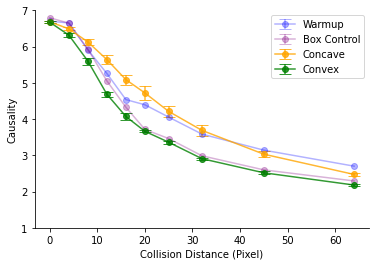

In [7]:
_, ax = plt.subplots(1,1)
plt.subplots_adjust(wspace = 0.35)

ax.errorbar(x=xpixels, y=ywarmup.mean(axis=(0,1)), 
             yerr=stats.sem(ywarmup.mean(axis=1), axis=0), 
             marker='o', color='blue', capsize=6, label='Warmup', alpha=0.3)
ax.errorbar(x=xpixels, y=yexp.mean(axis=(0,1)), 
             yerr=stats.sem(yexp.mean(axis=1), axis=0), 
             marker='o', color='purple', capsize=6, label='Box Control', alpha=0.3)
ax.errorbar(x=xpixels, y=yconcave.mean(axis=(0,1)), 
             yerr=stats.sem(yconcave.mean(axis=1), axis=0), 
             marker='o', color='orange', capsize=6, label='Concave', alpha=0.8)
ax.errorbar(x=xpixels, y=yconvex.mean(axis=(0,1)), 
             yerr=stats.sem(yconvex.mean(axis=1), axis=0), 
             marker='o', color='green', capsize=6, label='Convex', alpha=0.8)

ax.set_xlabel("Collision Distance (Pixel)")
ax.set_ylabel("Causality")
ax.set_ylim(1,7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

# Exponential Function

In [8]:
def func(x, a, b, c): # udpated exponential decay
  return a * np.exp(-(1/b) * np.array(x)) + c

In [9]:
LOWERBOUND = (1, 10, 1)
UPPERBOUND = (7, 80, 7)

In [10]:
def tresult(pvalue):
  # convert p value to "star" significance notation
  if pvalue < 0.0001:
    return '****'
  elif pvalue < 0.001:
    return '***'
  elif pvalue < 0.01:
    return '**'
  elif pvalue < 0.05:
    return '*'
  else:
    return 'NS'

# Curve Fitting by Bootstrapping

----------------------- Bootstrap curve fitting
Bootstrap iteration 0
Bootstrap iteration 100
Bootstrap iteration 200
Bootstrap iteration 300
Bootstrap iteration 400
Bootstrap iteration 500
Bootstrap iteration 600
Bootstrap iteration 700
Bootstrap iteration 800
Bootstrap iteration 900

Mean concave [abc]:
 [5.8028908693388095, 41.584063635348365, 1.1348040851624388]
Mean convex [abc]:
 [5.044448964869804, 20.539694000333046, 1.8977680356732867]

95% percentile concave [min abc], [max abc]:
 [5.328544243748101, 35.76270541666582, 1.0000000000000002] 
 [6.052063793925255, 47.53948964673234, 1.551073677698688]
95% percentile convex [min abc], [max abc]:
 [4.706020197993941, 18.291411912743115, 1.663002716197952] 
 [5.371555031571203, 23.086024392759764, 2.154464315842662]
Paired T-Test for b concave - convex: T=3.10e+02, P=0.00e+00 ****

Bootstrapped comparison success rate 1.0
----------------------- Plotting average subject fit


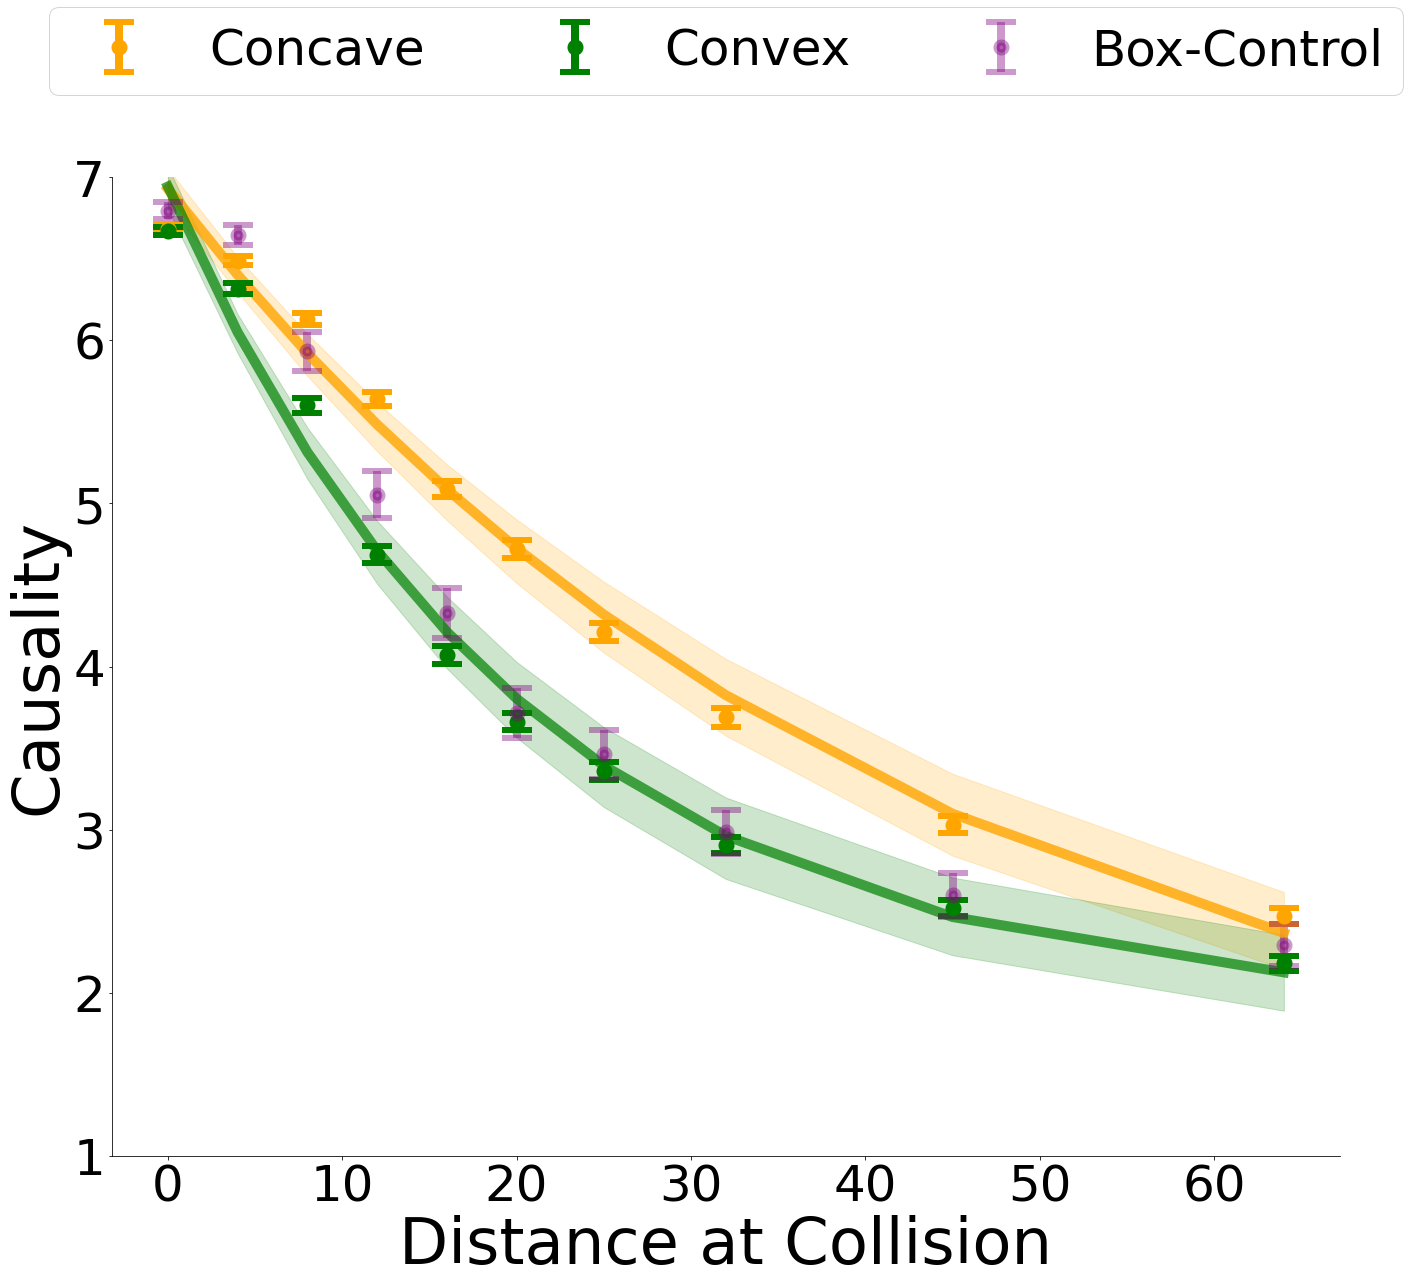

In [11]:
_, ax = plt.subplots(1,1, figsize=(22, 18))
plt.subplots_adjust(wspace = 0.35)

TICKFONTSIZE = 50
LABELFONTSIZE = 64
TITLEFONTSIZE = 60
LEGENDFONTSIZE = 50
ANNOTATIONFONTSIZE = 46


print('----------------------- Bootstrap curve fitting')

niter = 1000 # number of bootstraps for the fitting
sample_size = yconcave.shape[1] # [8 shapes, m subjects, 10 distances]

# initialize bootstrapped fitting results
concavea = [] # parameter a concave estimates
concaveb = [] # parameter b concave estimates
concavec = [] # parameter c concave estimates
convexa = [] # parameter a convex estimates
convexb = [] # parameter b convex estimates
convexc = [] # parameter c convex estimates
concavepred = np.zeros((niter, yconcave.shape[2])) # concave predictions
convexpred = np.zeros((niter, yconcave.shape[2])) # convex predictions

for n in range(niter): # iterate over every bootstrap
  
  if n%100 == 0: # print progress
    print('Bootstrap iteration', n)
  
  # sample the full sample size with replacement
  subject_idx = np.random.choice(a=sample_size, size=sample_size, replace=True)
  sampled_yconcave = yconcave[:, subject_idx, :] 
  sampled_yconvex = yconvex[:, subject_idx, :]
  
  # calculate concave and convex average response from the sample
  tmp_yconcave = sampled_yconcave.mean(axis=(0,1))
  tmp_yconvex = sampled_yconvex.mean(axis=(0,1))

  # concave curve fitting
  popt_concave, pcov_concave = curve_fit(func, xpixels, tmp_yconcave, 
                                         bounds=(LOWERBOUND, UPPERBOUND))
  concavea.append(popt_concave[0]) # store fitted parameter
  concaveb.append(popt_concave[1])
  concavec.append(popt_concave[2])

  # convex curve fitting
  popt_convex, pcov_convex = curve_fit(func, xpixels, tmp_yconvex, 
                                       bounds=(LOWERBOUND, UPPERBOUND))
  convexa.append(popt_convex[0])
  convexb.append(popt_convex[1])
  convexc.append(popt_convex[2])

  # store predictions using current parameter estimates
  concavepred[n] = func(xpixels, *popt_concave)
  convexpred[n] = func(xpixels, *popt_convex)

# Calculate the mean parameter estimates across all bootstrapped fits
concaveabc = [np.mean(concavea), np.mean(concaveb), np.mean(concavec)]
convexabc = [np.mean(convexa), np.mean(convexb), np.mean(convexc)]
print('\nMean concave [abc]:\n', concaveabc)
print('Mean convex [abc]:\n', convexabc)

# 95% parameter intervals from these bootstrapped fits
CI_concavem = [np.percentile(concavea, 2.5), np.percentile(concaveb, 2.5), np.percentile(concavec, 2.5)]
CI_concavep = [np.percentile(concavea, 97.5), np.percentile(concaveb, 97.5), np.percentile(concavec, 97.5)]
CI_convexm = [np.percentile(convexa, 2.5), np.percentile(convexb, 2.5), np.percentile(convexc, 2.5)]
CI_convexp = [np.percentile(convexa, 97.5), np.percentile(convexb, 97.5), np.percentile(convexc, 97.5)]
print('\n95% percentile concave [min abc], [max abc]:\n', CI_concavem, '\n', CI_concavep)
print('95% percentile convex [min abc], [max abc]:\n', CI_convexm, '\n', CI_convexp)

# plot 95% confidence region of the bootstrapped estimates
ax.fill_between(xpixels, np.percentile(concavepred, 2.5, axis=0), np.percentile(concavepred, 97.5, axis=0), color='orange', alpha=0.2)
ax.fill_between(xpixels, np.percentile(convexpred, 2.5, axis=0), np.percentile(convexpred, 97.5, axis=0), color='green', alpha=0.2)


# Compare if concave parameter b is different from convex parameter b
# perform paired t-test on bootstrapped concave b's and convex b's
btstats, bpval = stats.ttest_rel(concaveb, convexb)
print('Paired T-Test for b concave - convex: '+"T={:.2e}".format(btstats)+str(", P={:.2e}".format(bpval)+' '+tresult(bpval)))
# then compare the sampled concave b estimates to sampled convex b estimates, and report the success rate
niter_comparison = 10000 # number of comparisons to perform
bootstrapped_comparison = 0 # counter, the number of significant comparisons
concaveb = np.array(concaveb)
convexb = np.array(convexb)
for n in range(niter_comparison):
    # sample the full bootstrapped estimate size with replacement
    b_indices = np.random.choice(a=niter, size=niter, replace=True)
    bs_concave = concaveb[b_indices] # sampled b concave estimates
    bs_convex = convexb[b_indices] # sampled b convex estimates
    # perform paired t-test
    bstats, pval = stats.ttest_rel(bs_concave, bs_convex)
    if pval < 0.001:
        bootstrapped_comparison += 1 # increment counter
print('\nBootstrapped comparison success rate', bootstrapped_comparison / (niter_comparison))


print('----------------------- Plotting average subject fit')

# Average response data across all subjects
tmp_yconcave = yconcave.mean(axis=(0,1))
tmp_yconvex = yconvex.mean(axis=(0,1))

# concave fitting
popt_concave, pcov_concave = curve_fit(func, xpixels, tmp_yconcave,
                                       bounds=(LOWERBOUND, UPPERBOUND))
# convex fitting
popt_convex, pcov_convex = curve_fit(func, xpixels, tmp_yconvex, 
                                     bounds=(LOWERBOUND, UPPERBOUND))

# plot average subject curve for concave and convex
ax.plot(xpixels, func(xpixels, *popt_concave), 
        'g-', lw=10, color='orange', alpha=0.8)
ax.plot(xpixels, func(xpixels, *popt_convex), 
        'g-', lw=10, color='green', alpha=0.7)

# plot average subject response data for concave, convex and box-control (mean and SEM)
ax.errorbar(x=xpixels, y=yconcave.mean(axis=(0,1)), ms=10,
               yerr=stats.sem(yconcave.reshape((-1, len(xpixels))), axis=0), 
             linestyle='None', marker='o', color='orange', 
              lw=8, capsize=15, markeredgewidth=6, alpha=1,
             label='Concave')
ax.errorbar(x=xpixels, y=yconvex.mean(axis=(0,1)), ms=10,
               yerr=stats.sem(yconvex.reshape((-1, len(xpixels))), axis=0),
             linestyle='None', marker='o', color='green', 
            lw=8, capsize=15,  markeredgewidth=6, alpha=1,
             label='Convex')
ax.errorbar(x=xpixels, y=yexp.mean(axis=(0,1)), ms=10,
             yerr=stats.sem(yexp.reshape((-1, len(xpixels))), axis=0), 
             linestyle='None', marker='o', color='purple', 
            lw=8, capsize=15,  markeredgewidth=6, alpha=0.4,
            label='Box-Control')

# finalize plotting configurations
ax.set_ylim(1,7) # y axis range
ax.spines['right'].set_visible(False) # remove right and top plot border 
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_locator(MaxNLocator(integer=True)) # make y axis only show integers
ax.tick_params(axis="both", labelsize=TICKFONTSIZE) # adjust font size
ax.set_xlabel("Distance at Collision", fontsize=LABELFONTSIZE) # x axis label
ax.set_ylabel("Causality", fontsize=LABELFONTSIZE) # y axis label
ax.legend(loc='upper center', ncol=3, fontsize=LEGENDFONTSIZE, bbox_to_anchor=(0.5, 1.2)) # legend

# Alpha-Shape Analysis

## (Optional) Compute Effective Collision Distances

**Warning**: Running this block of code is time-consuming! \\
This block can be skipped if you have files "exp1_effective_distances.csv" and "exp1_ADR.csv" -- just proceed to the next block directly.

### Load Extra Packages

In [ ]:
!pip install alphashape
import alphashape
from shapely.geometry import Polygon, MultiPoint
from matplotlib.path import Path
import cv2
import multiprocessing

### Shape Meta Information

In [ ]:
''' 
shape: Shape of the Patient (A~H);
convex: Whether the Patient-hit-side is convex or concave;
contour: Coordinate of the vertices on patient, in format (x1, y1, x2, y2, x3, y3, ...);
y : The y-coordinate of the patient at initial state (x coordinate is always half length of the canvas);
angle: Rotation angle (in radian) applied on the Patient after being constructed from contour;
spatial_gap: (This is not the collision distance.) Spatial distance between centers of mass of the Agent and the Patient at the collision moment. 
'''
shape_meta = [
	{
		'shape': 'A',
		'convex': 'concave',
		'contour': '104 20 42 80 25 125 127 117 85 107 104 98',
		'y': 230,
		'angle': -np.pi,
		'spatial_gap': 88 
	},
	{
		'shape': 'A',
		'convex': 'convex',
		'contour': '41 23 46 102 66 110 23 119 127 125 105 81',
		'y': 230,
		'angle': -np.pi,
		'spatial_gap': 107 
	},
	{
		'shape': 'B',
		'convex': 'convex',
		'contour': '59 14 95 24 106 79 45 136 44 82 52 94 56 70 48 43',
		'y': 240,
		'angle': -np.pi*1.25,
		'spatial_gap': 94 
	},
	{
		'shape': 'B',
		'convex': 'concave',
		'contour': '96 12 59 18 43 75 101 137 105 82 96 94 93 72 105 40',
		'y': 215,
		'angle': -np.pi,
		'spatial_gap': 79 
	},
	{
		'shape': 'C',
		'convex': 'concave',
		'contour': '42 20 45 114 105 130 71 97 83 82 107 78 83 40 66 24',
		'y': 235,
		'angle': -np.pi*1.09,
		'spatial_gap': 85
	},
	{
		'shape': 'C',
		'convex': 'convex',
		'contour': '105 19 80 23 68 36 43 77 65 81 79 96 47 130 106 112',
		'y': 230,
		'angle': -np.pi*1,
		'spatial_gap': 87 
	},
	{
		'shape': 'D',
		'convex': 'convex',
		'contour': '108 25 35 54 38 123 49 106 81 119 110 119 105 109 113 109 99 96 66 86 115 91 54 63',
		'y': 235,
		'angle': 0,
		'spatial_gap': 96 
	},
	{
		'shape': 'D',
		'convex': 'concave',
		'contour': '40 28 113 55 113 122 102 106 70 119 41 119 45 110 38 109 49 98 81 85 35 89 92 64',
		'y': 240,
		'angle': -np.pi*0.07,
		'spatial_gap': 85 
	},
	{
		'shape': 'E',
		'convex': 'concave',
		'contour': '34 33 105 25 98 82 116 47 91 122 63 42 44 109 72 96 47 123 35 119',
		'y': 215,
		'angle': -np.pi*1.51,
		'spatial_gap': 106
	},
	{
		'shape': 'E',
		'convex': 'convex',
		'contour': '43 27 113 32 117 117 105 123 80 98 108 109 84 42 61 123 33 51 51 82',
		'y': 230,
		'angle': -np.pi*0.5,
		'spatial_gap': 99
	},
	{
		'shape': 'F',
		'convex': 'concave',
		'contour': '54 22 112 37 111 14 119 20 119 80 100 122 53 135 41 120 91 51 80 54 38 99 30 91 60 60 33 60 36 39',
		'y': 215,
		'angle': 0,
		'spatial_gap': 99,
	},
	{
		'shape': 'F',
		'convex': 'convex',
		'contour': '30 20 39 14 39 38 94 21 115 39 117 59 91 59 121 90 113 97 71 56 59 50 110 120 98 134 51 122 31 81',
		'y': 230,
		'angle': 0,
		'spatial_gap': 105,
	},
	{
		'shape': 'G',
		'convex': 'convex',
		'contour': '15 104 38 82 57 31 69 56 66 23 92 28 87 58 117 38 127 54 34 99 126 106 135 117 45 114 35 128',
		'y': 210,
		'angle': np.pi*0.2,
		'spatial_gap': 124,
	},
	{
		'shape': 'G',
		'convex': 'concave',
		'contour': '15 104 38 82 57 31 69 56 66 23 92 28 87 58 117 38 127 54 34 99 126 106 135 117 45 114 35 128',
		'y': 215,
		'angle': np.pi*0.95,
		'spatial_gap': 93,
	},
	{
		'shape': 'H',
		'convex': 'convex',
		'contour': '28 26 33 44 101 27 69 51 49 56 57 67 45 74 51 80 24 82 30 118 52 93 75 114 77 104 82 137 90 97 127 112 119 48 104 48 127 18 84 14',
		'y': 225,
		'angle': -np.pi*0.5,
		'spatial_gap': 115,
	},
	{
		'shape': 'H',
		'convex': 'concave',
		'contour': '27 15 75 15 127 29 119 47 55 26 78 49 102 58 95 67 107 77 101 82 126 88 119 122 99 95 74 114 72 104 64 136 59 95 24 111 34 44 47 44',
		'y': 215,
		'angle': -np.pi*1,
		'spatial_gap': 96,
	}
]


def list_to_pairs(ls): 
    """
    transform [1, 2, 3, 4] --> [(1, -2), (3, -4)]
    
    ls: list of numbers [x1, y1, x2, y2, ...]
    return: list of tuples [(x1, -y1), (x2, -y2), ...]
    """
    ls_ = list(map(int, ls))
    return list(zip(ls_[::2], [-y for y in ls_[1::2]]))

# apply list transform to all contour values
for i, meta in enumerate(shape_meta):
    shape_meta[i]['contour'] = list_to_pairs(meta['contour'].split(' '))

# Hyper-parameters
agent_angle = np.pi/1.7 # already flipped, can be applied into the counterclockwise rotation function directly
patient_angle = np.pi  # counter-clockwise

### Helper Functions

In [ ]:
def contour_to_cv2arr(contour):
    '''
    convert list contour to cv2 ndarray, which can be applied into cv2 functions directly
    
    contour: list contour
    return: cv2 ndarray, dim: (|n points|, 1, 2)
    '''
    return np.array(contour)[:, None, :]

def contour_from_cv2arr(contour_arr):
    '''
    convert cv2 ndarray to list contour

    contour_arr: cv2 ndarray, dim: (|n points|, 1, 2)
    return: list contour
    '''
    return contour_arr[:, 0, :].tolist()

In [ ]:
def contour_to_cloud(contour, density=1.0, granularity=0.5):
    '''
    Convert the contour (including edges) to a cloud of points.

    contour: list contour.
    density: density of the point cloud. Default is 1.0, meaning that 100% of the points will be returned.
    granularity: distance between points (before dropping). Default is 1, meaning that adjacent points will be 1 unit apart from one another abs(x1-x2)==1.

    Return: list of point tuples [(x1, y1), (x2, y2), ...], where m is the number of points finally selected
    '''
    xmax, ymax = np.max([x for (x,_) in contour]), np.max([y for (_,y) in contour])
    xmin, ymin = np.min([x for (x,_) in contour]), np.min([y for (_,y) in contour])
    
    boxx, boxy = np.meshgrid(np.arange(xmin, xmax, granularity), np.arange(ymin, ymax, granularity)) # make a bounding box filled with points
    boxx, boxy = boxx.flatten(), boxy.flatten()
    boxpoints = np.vstack((boxx, boxy)).T 

    p = Path(contour) # make a matplotlib Path object for the contour
    iscontained = p.contains_points(boxpoints) # boolean mask for the list of points in box
    contourcloud = boxpoints[iscontained] # extract the point cloud within the contour

    isselected = [np.random.binomial(1, density)==1 for i in range(len(contourcloud))] # randomly select part of the contour cloud based on density
    contourcloud = contourcloud[isselected]

    return tuple(map(tuple, contourcloud)) # converting

In [ ]:
def draw_contour(c, linestyle='-', color='green', alpha=1.0, img_size=(1000, 500)):
    '''
    Render the contour
    c: list contour
    '''
    # Draw lines between each sequential pair of points in a contour  
    for i in range(len(c)):
        x1, y1 = c[i]
        # Handle edge case where the last point of the contour connects to the first point
        if i < len(c) - 1:
            x2, y2 = c[i+1]
        else:
            x2, y2 = c[0]
        plt.plot([x1, x2], [y1, y2], 'ro-', linestyle=linestyle, color=color, alpha=1.0)

def draw_cloud(cloud, markersize=2, color='green', img_size=(1000, 500)):
    '''
    render the point cloud

    cloud: list of point tuples in the cloud [(x1, y1), (x2, y2), ...]
    '''
    plt.scatter(*zip(*cloud), s=markersize, c=color, marker='o')


In [ ]:
def contour_centroid(contour):
    """ 
    find the centroid (center of mass) of contour, source https://www.pyimagesearch.com/2016/02/01/opencv-center-of-contour/

    contour: list contour
    return: centroid coordinate x and y
    """
    M = cv2.moments(contour_to_cv2arr(contour))
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])
    return cX, cY


def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin. source https://stackoverflow.com/a/34374437

    origin: centroid of contour (ox,oy)
    point: the point to rotate
    angle: radians angle

    return: rotated point coordinate x, y
    """
    ox, oy = origin
    px, py = point

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    return int(qx), int(qy)


def rotate_contour(contour, angle):
    ''' 
    rotate every point on the contour counterclockwise
    
    contour: list contour
    angle: radians

    return: list contour after rotation
    '''
    cx, cy = contour_centroid(contour)
    return [rotate((cx, cy), (x, y), angle) for x, y in contour]


def recenter_contour(contour, new_center):
    ''' 
    translate every point on contour and reset its centroid

    contour: list contour
    new_center: the destination centroid point (x, y)

    return: list contour after translation
    '''
    nx, ny = new_center
    cx, cy = contour_centroid(contour)
    return [(x - cx + nx, y - cy + ny) for x, y in contour]


def mirror_horizontal(contour):
    '''
    Horizontally flip the contour

    contour: list contour
    return: list contour after mirroring
    '''
    x, y = Polygon(np.array(contour).dot([[-1,0], [0,1]])).exterior.coords.xy
    mirrored = list(zip(list(map(int, x)), list(map(int, y))))
    # remove duplicate vertices (start and end vertices are duplicates)
    seen = set()
    seen_add = seen.add
    return [x for x in mirrored if not (x in seen or seen_add(x))]

In [ ]:
def apply_alphashape(cloud, alpha=0):
    '''
    Apply alpha shape algorithm to the point cloud.

    cloud: list of tuples of points in the cloud [(x1, y1), (x2, y2), ...]
    alpha: alpha value (0==convex hull)

    return: list of tuples of vertices on the contour [(x1, y1), (x2, y2), ...]
    '''
    alpha_shape = alphashape.alphashape(cloud, alpha)
    x, y = alpha_shape.exterior.coords.xy
    smoothed_contour = list(zip(x, y))
    # remove duplicate vertices (start and end vertices are duplicates)
    seen = set()
    seen_add = seen.add
    return [x for x in smoothed_contour if not (x in seen or seen_add(x))]

In [ ]:
def get_contour(shape, convex):
    '''
    prepare the contour information from shape meta data

    shape: the shape to be prepared
    convex: string concave or convex
    return: prepared list of contours [x1, y1, x2, y2, ...]
    '''
    return [m for m in shape_meta if ((m['shape'] == shape) and (m['convex'] == convex))][0]

### Compute Effective Collision Distances

In [ ]:
def fit_line(xarray, yarray, degree=1):
    '''
    fit line y = ax + b, (degree==1)

    xarray: list of x values
    yarray: list of y values
    degree: default is line fit

    return: slope a, intercept b
    '''
    a, b = np.polyfit(xarray, yarray, 1)
    if np.abs(a) <= 10**(-13): # correct the inaccurate polyfit of horizontal line
        a = 0
    return a, b

In [ ]:
def find_closest_point_to_y(c, y, left_most=True, skip_assert=False):
    """ 
    Find left-most point on contour `c` that is hit by horizontal line f(x)=y. This is used to find the exact collision point between two bodies.
    NOTE (2/3): added new arg `left_most` so this works for agent to. If this is false, do right-most instead

    c: list contour, default is patient
    y: the y-axis value of the horizontal line, default is the y value of the collision point on agent
    left_most: default true; true if c is patient on the right, y is the collision point on agent on the left; false if c is agent on the left, y is a collision point on the patient on the right;
    skip_assert: false if need to assert final distance value

    return: the x-value of the effective collision point on c, (min_x, y)
    """
    min_x = float('inf') if left_most else -float('inf')

    for i in range(len(c)):
        x1, y1 = c[i]
        x2, y2  = (c[i+1] if i < len(c) - 1 else c[0])

        # only these line segments intersect with the y-axis
        if (y1 >= y >= y2) or (y1 <= y <= y2):
            ## compute line that intersects these points to compute f^-1(y) = x

            if x1 == x2:  # slope won't work for vertical line, so just use its x-value
                fx = x1  
            elif y1 == y2:  # slope won't work for horizontal line, so just use its left/right-most value
                fx = min([x1, x2]) if left_most else max([x1, x2])
            else:
                # y = ax + b  -->  x = (y - b) / a
                a, b = fit_line([x1, x2], [y1, y2])
                fx = int((y - b) / a)

            if (fx < min_x and left_most) or (fx > min_x and not left_most):
                min_x = fx

    if not skip_assert:
        assert (min_x < float('inf') and left_most) or (min_x > -float('inf') and not left_most)
    return (min_x, y)



def _x_helper(c1, c2, left_most=True):
    """
    Find the closest horizontal distance between a vertex on c1 and an edge on c2.
    For every vertex on c1, loop through edges on c2 and find the smallest x distance (can be negative).
    Note: if  left_most=True  then  c1=agent (on the left), c2=patient (on the right)

    c1: list contour of an object (default is agent on the left). Will iterate over vertices on c1.
    c2: list contour of another object (default is patient on the right). Will iterate over edges on c2 when fixing a vertex on c1.
    left_most: default True means c1 is agent on the left (collision point is a vertex on agent), False when c1 is on the right (patient).

    return: minimum x distance between a vertex on c1 and an edge on c2, (collision point on agent (xa, ya), collision point on patient (xp, yp))
    """
    min_distance = float('inf')
    min_points = (c1[0], c2[0]) if left_most else(c2[0], c1[0])

    # for each vertex (x,y)
    for x1, y1 in c1:
        
        # loop through each line segment on the other shape that intersects y, find the closest x'
        x2, _ = find_closest_point_to_y(c2, y1, left_most=left_most, skip_assert=True)

        # if left_most=True, then we're assuming c2 is to the right of c1
        d = (x2 - x1) if left_most else (x1 - x2)

        if d < min_distance:
            min_distance = d
            min_points = ((x1, y1), (x2, y1)) if left_most else ((x2, y1), (x1, y1))

    return min_distance, min_points


def collision_distance_x(agent_contour, patient_contour):
    '''
    Find the horizontal (along x-axis) effective collision distance between two bodies (can be negative if bodies overlap)

    agent_contour: list contour of agent
    patient_contour: list contour of patient

    return: horizontal collision distance, collision points on agent and on patient ((xa, ya), (xp, yp)), note ya==yp
    '''
    min_distance1, min_points1 = _x_helper(agent_contour, patient_contour, left_most=True)
    min_distance2, min_points2 = _x_helper(patient_contour, agent_contour, left_most=False)

    if min_distance1 < min_distance2:
        return min_distance1, min_points1
    else:
        return min_distance2, min_points2

In [ ]:
def dist_euclidean(x1, y1, x2, y2):
    '''
    calculate the euclidean distance between two points

    x1, y1: coordinate of first point
    x2, y2: coordination of second point

    return: euclidean distance (non-negative)
    '''
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)


def closest_point(line_pt1, line_pt2, close_pt):
    """
    Get the point on line segment (line_pt1, line_pt2) that is closest to close_pt. source: https://stackoverflow.com/a/47198877, updated to handle line segments.

    line_pt1: the starting point x1,y1 of the line segment 
    line_pt2: the ending point x2, y2 of the line segment
    close_pt: the point x3, y3 from which to draw a perpendicular line to the line segment

    return: x, y coordinate of the point on the line segment with closest distance to close_pt
    """
    x1, y1 = line_pt1
    x2, y2 = line_pt2
    x3, y3 = close_pt
    dx, dy = x2-x1, y2-y1
    det = dx*dx + dy*dy
    a = (dy*(y3-y1) + dx*(x3-x1)) / det

    x_closest = x1 + a*dx
    y_closest = y1 + a*dy

    # if closest point is not on this line segment, return line_pt1 or line_pt2
    if (x_closest < min(x1, x2)) or (x_closest > max(x1, x2)):
        d1 = dist_euclidean(*line_pt1, *close_pt)
        d2 = dist_euclidean(*line_pt2, *close_pt)
        return (line_pt1 if d1 < d2 else line_pt2)
    elif (y_closest < min(y1, y2)) or (y_closest > max(y1, y2)):
        d1 = dist_euclidean(*line_pt1, *close_pt)
        d2 = dist_euclidean(*line_pt2, *close_pt)
        return (line_pt1 if d1 < d2 else line_pt2)
    else:
        return x_closest, y_closest


def _euclidean_helper(c1, c2):
    """
    Helper function for `collision_distance_euclidean`. Iterate through c1's vertices and c2's edges to find the closest point and euclidean distance
    
    c1: list contour of one object, iterate its vertices
    c2: list contour of another object, iterate its edges

    return: minimum distance, collision points (one of c1's vertices, one point on c2's edges)
    """
    min_points = [c1[0], c2[0]]
    min_distance = float('inf')

    for p1 in c1:
        for i2 in range(len(c2)):
            p2 = c2[i2]
            p3 = c2[(i2 + 1 if (i2 < len(c2)-1) else 0)]

            x1, y1 = p1
            x2, y2 = closest_point(p2, p3, p1)
        
            d = dist_euclidean(x1, y1, x2, y2)
            if d < min_distance:
                min_distance = d
                min_points = ((x1, y1), (x2, y2))

    return min_distance, min_points


def collision_distance_euclidean(contour1, contour2):
    """
    Find the point on each contour's perimeter that minimizes their distance.
    Note: when contours overlap, the min distance may be meaningless. try to manually set collision point and calculate negative distance, or turn distance to 0.
    
    contour1: list contour of the frist object
    contour2: list contour of the second object

    return: minimum euclidean distance (non-negative), collision points on two objects ((x1,y1), (x2,y2))
    """
    min_points = [contour1[0], contour2[0]]
    min_distance = float('inf')

    # First, find min distance for each point in c1 and each line segment in c2
    min_distance1, min_points1 = _euclidean_helper(contour1, contour2)

    # Next, find min distance for each point in c2 and each line segment in c1
    min_distance2, min_points2 = _euclidean_helper(contour2, contour1)

    if min_distance1 < min_distance2:
        return min_distance1, min_points1
    else:
        return min_distance2, min_points2

In [ ]:
# Choosing parameters
alpha_values = [0.01, 0.02, 0.03, 0.04, 0.045, 0.047, 0.049, 0.05, 0.051, 0.053, 0.055, 0.06, 0.1, 0.2, 0.3, 0.6, 1.0]
density = 1.0 # density parameter for generating point cloud from polygons
granularity = 0.5 # granularity parameter for generating point cloud from polygons

# Fixed Parameters
x_raw_distances = [0, 4, 8, 12, 16, 20, 25, 32, 45, 64] # ground-truth collision distances
agent_angle = np.pi/1.7  # counter-clockwise 
patient_init_x = 500     # arbitrary value used since we reposition the patient relative to agent
agent_x, agent_y = (0, -250)   

# Initialize the Agent (the same irregular Agent was used in every experiment trial)
agent_meta = get_contour('B', 'concave')
agent_contour = recenter_contour(
    rotate_contour(agent_meta['contour'], agent_angle),
    (agent_x, agent_y)
)

In [ ]:
def process_meta(meta):
    '''
    This function is designed for parallel processing. 
    Calculate effective collision distances for one shape (across all ground-truth collision distances).
    
    meta: dictionary of a shape, containing information such as contour, y, angle, spatial_gap, etc.
    return: none
    '''
    rows = [] # output list of distance dictionaries
    for x_raw in x_raw_distances: 
        # Configure the Patient information
        patient_x = agent_x + meta['spatial_gap'] + x_raw
        patient_contour = rotate_contour(
            recenter_contour(meta['contour'], 
                             (patient_x, -meta['y'])), 
            -meta['angle'] 
        )
        row_meta = {k: v for k, v in meta.items() if k not in ('contour', 'y', 'angle', 'spatial_gap')}
        row_meta['x_raw'] = x_raw
        print(row_meta)

        # Generate the Agent and Patient point cloud
        agent_cloud = contour_to_cloud(agent_contour, density=density, granularity=granularity)
        patient_cloud = contour_to_cloud(patient_contour, density=density, granularity=granularity)

        # Compute alpha-shapes and effective distances for every alpha-value
        for alpha in alpha_values:
            # Alpha-shapes
            agent_smooth = apply_alphashape(agent_cloud, alpha) 
            patient_smooth = apply_alphashape(patient_cloud, alpha)
            
            # (Horizontal) effective collision distance and Euclidean effective collision distance
            dist_x, collision_pts_x = collision_distance_x(agent_smooth, patient_smooth) # collision_pts_x: ((xa, ya), (xp, yp)), note that ya==yp
            dist_euc, collision_pts_e = collision_distance_euclidean(agent_smooth, patient_smooth) # collision_pts_e: ((x1,y1), (x2,y2)), 1 might not be agent
            if dist_x <= 0: # replace negative Eucldiean distances by 0
                dist_euc = 0
            
            # Append results to dataframe
            rows.append({
                **row_meta, 
                **{
                    'algorithm': 'alpha_shape',
                    'parameter': alpha,
                    'dist_euclidean': dist_euc,
                    'dist_horizontal': dist_x
                }
            })

    return rows
      



# Calculate effective distances for every Patient shape in parallel
pool = multiprocessing.Pool(16)
results = pool.map(process_meta, shape_meta)
# read out results from parallel processes
mydf = []
for r in results:
    mydf += r

# Save results
df = pd.DataFrame(mydf)
df.to_csv('exp1_effective_distances.csv', index=False)

{'shape': 'G', 'convex': 'convex', 'x_raw': 0}
{'shape': 'F', 'convex': 'concave', 'x_raw': 0}
{'shape': 'E', 'convex': 'convex', 'x_raw': 0}
{'shape': 'H', 'convex': 'convex', 'x_raw': 0}
{'shape': 'C', 'convex': 'convex', 'x_raw': 0}
{'shape': 'B', 'convex': 'convex', 'x_raw': 0}
{'shape': 'G', 'convex': 'concave', 'x_raw': 0}
{'shape': 'B', 'convex': 'concave', 'x_raw': 0}
{'shape': 'D', 'convex': 'concave', 'x_raw': 0}
{'shape': 'F', 'convex': 'convex', 'x_raw': 0}
{'shape': 'D', 'convex': 'convex', 'x_raw': 0}
{'shape': 'E', 'convex': 'concave', 'x_raw': 0}
{'shape': 'A', 'convex': 'concave', 'x_raw': 0}
{'shape': 'A', 'convex': 'convex', 'x_raw': 0}
{'shape': 'H', 'convex': 'concave', 'x_raw': 0}
{'shape': 'C', 'convex': 'concave', 'x_raw': 0}
{'shape': 'D', 'convex': 'concave', 'x_raw': 4}
{'shape': 'D', 'convex': 'convex', 'x_raw': 4}
{'shape': 'C', 'convex': 'concave', 'x_raw': 4}
{'shape': 'C', 'convex': 'convex', 'x_raw': 4}
{'shape': 'E', 'convex': 'convex', 'x_raw': 4}
{'s

### Compute Area Difference Ratio

In [ ]:
def PolyArea(contour):
    '''
    input: list contour
    output: area size
    '''
    # convert list contour to two lists of x values and y values
    x, y = list(map(list, zip(*contour)))
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [ ]:
def process_area(meta):
    '''
    This function is designed for parallel processing. 
    Calculate area for one shape (initial shape and its alpha-shape approximation)
    
    meta: dictionary of a shape, containing information such as contour, y, angle, spatial_gap, etc.
    return: none
    '''
    # Initialize the Patient information
    rows = [] # output 
    patient_x = agent_x + meta['spatial_gap']
    patient_contour = rotate_contour(
        recenter_contour(meta['contour'], 
                          (patient_x, -meta['y'])), 
        -meta['angle'] 
    )
    row_meta = {k: v for k, v in meta.items() if k not in ('contour', 'y', 'angle', 'spatial_gap')}
    print(row_meta)
    
    # original shape area of the Patient
    patient_orig_area = PolyArea(patient_contour) 
    # point cloud of the Patient
    patient_cloud = contour_to_cloud(patient_contour, density=density, granularity=granularity)

    # Iterate over every alpha-shape model
    for alpha in alpha_values:
        patient_smooth = apply_alphashape(patient_cloud, alpha) # alpha-shape of the Patient
        patient_new_area = PolyArea(patient_smooth) # area of the alpha-shape
        diff_area = patient_new_area - patient_orig_area # area difference
        ratio_diff_area = diff_area / patient_orig_area # area difference ratio

        rows.append({
            **row_meta, 
            **{
                'algorithm': 'alpha_shape',
                'parameter': alpha,
                'area_orig': patient_orig_area,
                'area_new': patient_new_area,
                'area_diff': diff_area,
                'area_diff_ratio': ratio_diff_area
            }
        })

    return rows

# Calculate ADR for every shape in parallel
pool = multiprocessing.Pool(16)
results = pool.map(process_area, shape_meta)
# read out parallel processes results
mydf = []
for r in results:
    mydf += r

# calculate average ADR for every alpha-shape model
df = pd.DataFrame(mydf)
for alpha in alpha_values:
    meanratio = df.loc[(df["algorithm"]=="alpha_shape") & (df["parameter"]==alpha)].area_diff_ratio.mean()
    print(meanratio)
    df.loc[len(df.index)] = {'shape': 'all', 'convex': 'all', 'algorithm': 'alpha_shape', 'parameter': alpha, 
               'area_orig': None, 'area_new': None , 'area_diff': None,
               'area_diff_ratio': meanratio}

# Save results
df.to_csv('exp1_ADR.csv', index=False)       

{'shape': 'A', 'convex': 'convex'}
{'shape': 'A', 'convex': 'concave'}
{'shape': 'B', 'convex': 'concave'}
{'shape': 'E', 'convex': 'concave'}
{'shape': 'C', 'convex': 'concave'}
{'shape': 'F', 'convex': 'concave'}
{'shape': 'B', 'convex': 'convex'}
{'shape': 'F', 'convex': 'convex'}
{'shape': 'H', 'convex': 'convex'}
{'shape': 'H', 'convex': 'concave'}
{'shape': 'G', 'convex': 'concave'}
{'shape': 'C', 'convex': 'convex'}
{'shape': 'E', 'convex': 'convex'}
{'shape': 'G', 'convex': 'convex'}
{'shape': 'D', 'convex': 'concave'}
{'shape': 'D', 'convex': 'convex'}
0.4049200103456845
0.3821237760790597
0.3535009873950583
0.28473065111072066
0.2508640486720583
0.24259796382381027
0.2320509253971601
0.22326405248191522
0.21908894572093596
0.20983504837543832
0.20157033709170033
0.1803909426591207
0.11370236891535326
0.0217518129486204
0.0012946770257210717
-0.014940168301326046
-0.017812590411171052


## Load Effective Collision Distances

In [15]:
# Load effective distances produced by different alphashape algorithms
distancedf = pd.read_csv('exp1_effective_distances.csv')

In [16]:
distancedf[0:20]

,shape,convex,x_raw,algorithm,parameter,dist_euclidean,dist_horizontal
0,A,concave,0,alpha_shape,0.010,0.0,-24.5
1,A,concave,0,alpha_shape,0.020,0.0,-22.5
2,A,concave,0,alpha_shape,0.030,0.0,-20.5
3,A,concave,0,alpha_shape,0.040,0.0,-16.5
4,A,concave,0,alpha_shape,0.045,0.0,-14.5
5,A,concave,0,alpha_shape,0.047,0.0,-14.5
6,A,concave,0,alpha_shape,0.049,0.0,-13.5
7,A,concave,0,alpha_shape,0.050,0.0,-13.5
8,A,concave,0,alpha_shape,0.051,0.0,-13.5
9,A,concave,0,alpha_shape,0.053,0.0,-13.5


In [17]:
# replace dist_horizontal negative by 0, dist_euclidean is already nonnegative
distancedf.dist_horizontal = distancedf.dist_horizontal.mask(distancedf.dist_horizontal.lt(0),0)

## Load Area Difference Ratio

In [18]:
# Load average area difference ratio for different alphashape models
areadf = pd.read_csv('exp1_ADR.csv')

## Prepare X and Y Data

In [19]:
# model parameters
alpha_values =  distancedf["parameter"].unique() # [0.01, 0.02, 0.03, 0.04, 0.045, 0.047, 0.049, 0.05, 0.051, 0.053, 0.055, 0.06, 0.1, 0.2, 0.3, 0.6, 1.0]
num_models = len(alpha_values)
# Initialize X data (effective horizontal distance in every trial, for every alpha-shape model)
X = np.zeros((data.shape[1]-20, num_models)) 
print('X.shape', X.shape) # [num_trials (no box trials), num_models]

X.shape (160, 17)


In [20]:
# Load horizontal effective distance for every alpha-shape model
for i in range(0, num_models):
  X[:, i] = distancedf.loc[(distancedf["algorithm"]=="alpha_shape") & (distancedf["parameter"]==alpha_values[i])]["dist_horizontal"]

In [21]:
# Prepare Y data (human causality ratings)
Yall = np.array(data[data.columns[(data.columns.str.contains('warmup')==False) & (data.columns.str.contains('exp')==False)]]) 
print('Yall.shape', Yall.shape) # [num_subjects, num_trials (no box)]
# The average Y data across all subjects
Y = data[data.columns[(data.columns.str.contains('warmup')==False) & (data.columns.str.contains('exp')==False)]].mean(axis=0) 
print('average Y.shape', Y.shape) # [num_trials, ]

Yall.shape (147, 160)
average Y.shape (160,)


In [22]:
# Find the trial indices for concave and convex
tmp = np.array(distancedf.loc[(distancedf["algorithm"]=="alpha_shape") & (distancedf["parameter"]==0.05)]) # pick a random alpha value
concave_idx = []
convex_idx = []
for i in range(len(tmp)):
  if 'concave' in tmp[i]:
    concave_idx.append(i)
  if 'convex' in tmp[i]:
    convex_idx.append(i)

print('Concave trial indices:', concave_idx)
print('Convex trial indices:', convex_idx)

Concave trial indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Convex trial indices: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]


## Fit All Alpha-Shape Models

In [23]:
def sqrt_mean_squared_error(Y_pred, Y_true):
    # Calculate RMSE between predicted and actual human responses
    return np.sqrt(np.square(np.subtract(Y_true, Y_pred)).mean())

Alpha-shape model idx 0 , alpha value 0.01 , ADR 40.492001034568446
Alpha-shape model idx 1 , alpha value 0.02 , ADR 38.212377607905964
Alpha-shape model idx 2 , alpha value 0.03 , ADR 35.35009873950583
Alpha-shape model idx 3 , alpha value 0.04 , ADR 28.473065111072067
Alpha-shape model idx 4 , alpha value 0.045 , ADR 25.08640486720583
Alpha-shape model idx 5 , alpha value 0.047 , ADR 24.25979638238103
Alpha-shape model idx 6 , alpha value 0.049 , ADR 23.20509253971601
Alpha-shape model idx 7 , alpha value 0.05 , ADR 22.32640524819152
Alpha-shape model idx 8 , alpha value 0.051 , ADR 21.9088945720936
Alpha-shape model idx 9 , alpha value 0.053 , ADR 20.983504837543833
Alpha-shape model idx 10 , alpha value 0.055 , ADR 20.157033709170037
Alpha-shape model idx 11 , alpha value 0.06 , ADR 18.03909426591207
Alpha-shape model idx 12 , alpha value 0.1 , ADR 11.370236891535326
Alpha-shape model idx 13 , alpha value 0.2 , ADR 2.17518129486204
Alpha-shape model idx 14 , alpha value 0.3 , ADR 0

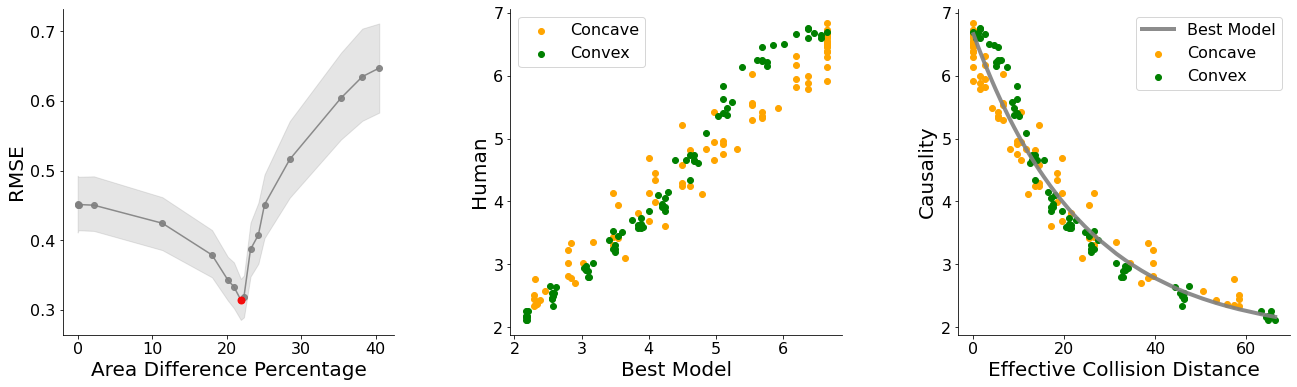

In [24]:
# Bounds for the curve parameter abc
LOWERBOUND = (1, 20, 1) 
UPPERBOUND = (7, 80, 7)

# Use average area difference ratio as the xaxis in the performance plot across alpha-shape models
xaxis = [float(areadf.loc[(areadf["algorithm"]=="alpha_shape") & (areadf['parameter']==alpha) & (areadf['shape']=='all')].area_diff_ratio) for alpha in alpha_values] # alpha_values
xaxis = 100 * np.array(xaxis) # area change percentage
xaxis[xaxis<0] = 0 # clean by replacing negative area diff ratio by 0s
modelrange = range(0, num_models)
niter = 1000 # number of iterations of bootstrap curve fitting in every alpha-shape model
metric = 'Sqrt Mean Squared Error'  # alpha-shape model performance evaluation metric
model_parameters = alpha_values

# Plotting configurations
TICKFONTSIZE = 16
LABELFONTSIZE = 20
TITLEFONTSIZE = 20
LEGENDFONTSIZE = 16
ANNOTATIONFONTSIZE = 16
_, ax = plt.subplots(1,3, figsize=(22, 6))
plt.subplots_adjust(wspace=0.35)

# Initialize curve fit parameter estimates for every alpha-shape model and every iteration
performance = np.zeros((niter, len(modelrange))) # RMSE between human data vs prediction for each iteration in every model
alist = np.zeros((niter, len(modelrange))) # mean a parameter for each iteration in every model
blist = np.zeros((niter, len(modelrange))) # mean b parameter for each iteration in every model
clist = np.zeros((niter, len(modelrange))) # mean c parameter for each iteration in every model

sample_size = Yall.shape[0] # number of subjects
xs = [] # x-axis values in every iteration
predictions = [] # prediction in every iteration

# Iterate over every alpha-shape model
for imodel in modelrange:
    print('Alpha-shape model idx', imodel, ', alpha value', alpha_values[imodel], ', ADR', xaxis[imodel])
    xtmp = X[:, imodel] # the effective collision distances from the current model
    
    # Iterate over every bootstrap curve fit
    for i in range(niter): 
        # randomly sample subjects of full sample size, with replacement
        subject_idx = np.random.choice(a=sample_size, size=sample_size, replace=True)
        ytmp = Yall[subject_idx, :].mean(axis=0) # average causality scores over sampled subjects

        # Curve fitting
        parameters, pcov = curve_fit(func, xtmp, ytmp, 
                                     bounds=(LOWERBOUND, UPPERBOUND))
        alist[i, imodel] = parameters[0] # store parameter estimates
        blist[i, imodel] = parameters[1]
        clist[i, imodel] = parameters[2]

        # prediction 
        prediction = func(xtmp, *parameters)
        if metric == 'Sqrt Mean Squared Error':
            perf = sqrt_mean_squared_error(prediction, ytmp)
        performance[i, imodel] = perf # record performance

        xs.append(xtmp) # store effective collision distances
        predictions.append(prediction) # store predictions

# Determine the best alpha-shape model according to performance score
bestmodeli = np.argmin(performance.mean(axis=0)) 
print('Best model index', bestmodeli)
print('Best alpha value', alpha_values[bestmodeli])
print('Best xaxis value (ADR)', xaxis[bestmodeli])
print('Best model performance 95% CI:', np.percentile(performance, 2.5, axis=0)[bestmodeli], np.percentile(performance, 97.5, axis=0)[bestmodeli])
print('Parameter a (mean, SEM):', alist.mean(axis=0), stats.sem(alist,axis=0))
print('Parameter b (mean, SEM):', blist.mean(axis=0), stats.sem(blist,axis=0))
print('Parameter c (mean, SEM):', clist.mean(axis=0), stats.sem(clist,axis=0))
print('Best abc', alist[:, bestmodeli].mean(), blist[:, bestmodeli].mean(), clist[:, bestmodeli].mean())

# Extract best alpha-shape model prediction
bestprediction = func(X[:, min(modelrange) + bestmodeli], *(alist[:, bestmodeli].mean(), blist[:, bestmodeli].mean(), clist[:, bestmodeli].mean()))
bestpredictionconcave = [bestprediction[i] for i in concave_idx] # best prediction in concave trials
bestpredictionconvex = [bestprediction[i] for i in convex_idx] # best prediction in convex trials
Yconcave = [Y[i] for i in concave_idx] # human responses in concave trials
Yconvex = [Y[i] for i in convex_idx] # human responses in convex trials
if metric == 'Sqrt Mean Squared Error': # rename
    metric = 'RMSE'

# Plot performance across all alpha-shape models
ax[0].plot(xaxis, performance.mean(axis=0), 
            marker='o', ls='-', alpha=0.9, color='gray')
ax[0].plot(xaxis[bestmodeli], performance.mean(axis=0)[bestmodeli],
        marker='o', ms=7, alpha=0.9, color='red')
ax[0].fill_between(xaxis,
                np.percentile(performance, 2.5, axis=0), 
                np.percentile(performance, 97.5, axis=0),
                color='gray', alpha=0.2)
ax[0].set_xlabel('Area Difference Percentage', fontsize=LABELFONTSIZE)
ax[0].set_ylabel(metric, fontsize=LABELFONTSIZE)
ax[0].tick_params(axis="both", labelsize=TICKFONTSIZE) 
ax[0].spines['right'].set_visible(False) # remove top and right border
ax[0].spines['top'].set_visible(False)
ax[0].yaxis.set_ticks_position('left')
ax[0].xaxis.set_ticks_position('bottom')

# Plot prediction against human data for the best alpha-shape model
ax[1].scatter(x=bestpredictionconcave, y=Yconcave, label='Concave', color='orange')
ax[1].scatter(x=bestpredictionconvex, y=Yconvex, label='Convex', color='green')
ax[1].set_xlabel('Best Model', fontsize=LABELFONTSIZE)
ax[1].set_ylabel('Human', fontsize=LABELFONTSIZE)
ax[1].tick_params(axis="both", labelsize=TICKFONTSIZE) 
ax[1].legend(loc='upper left', fontsize=LEGENDFONTSIZE)
ax[1].spines['right'].set_visible(False) # remove top and right border
ax[1].spines['top'].set_visible(False)
ax[1].yaxis.set_ticks_position('left')
ax[1].xaxis.set_ticks_position('bottom')

# Plot best alpha-shape model curve fit and human data
ax[2].plot(sorted(X[:, min(modelrange)+bestmodeli]), 
           [x for _,x in sorted(zip(X[:, min(modelrange)+bestmodeli], bestprediction))], 
           'g-', lw=4,  color='gray', alpha=0.9, label='Best Model')
Xconcave = [X[i, min(modelrange)+bestmodeli] for i in concave_idx] # concave effective collision distances
Xconvex = [X[i, min(modelrange)+bestmodeli] for i in convex_idx] # convex effective collision distances
ax[2].scatter(x=Xconcave, y=Yconcave, label='Concave', color='orange')
ax[2].scatter(x=Xconvex, y=Yconvex, label='Convex', color='green')
ax[2].set_xlabel('Effective Collision Distance', fontsize=LABELFONTSIZE)
ax[2].set_ylabel('Causality', fontsize=LABELFONTSIZE)
ax[2].tick_params(axis="both", labelsize=TICKFONTSIZE) 
ax[2].legend(fontsize=LEGENDFONTSIZE)
ax[2].spines['right'].set_visible(False) # remove top and right border
ax[2].spines['top'].set_visible(False)
ax[2].yaxis.set_ticks_position('left')
ax[2].xaxis.set_ticks_position('bottom')

## Plot Performance Across Models

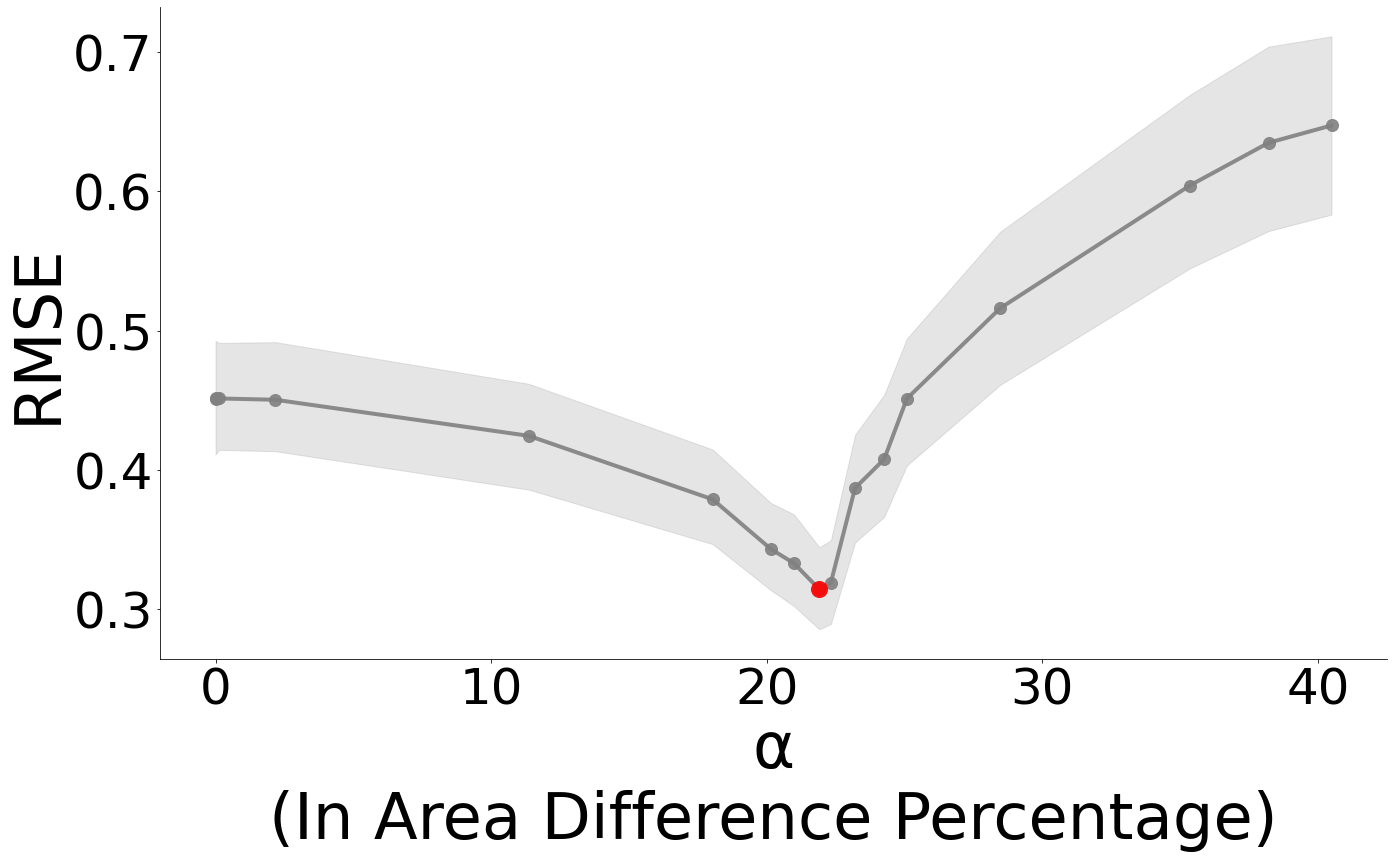

In [25]:
_, ax = plt.subplots(1,1, figsize=(22, 12))
LABELFONTSIZE = 64
TICKFONTSIZE = 50

ax.plot(xaxis, performance.mean(axis=0), 
            marker='o', ms=12, ls='-', lw=4, alpha=0.9, color='gray')
ax.plot(xaxis[bestmodeli], performance.mean(axis=0)[bestmodeli],
        marker='o', ms=16, alpha=0.9, color='red')
ax.fill_between(xaxis,
                np.percentile(performance, 2.5, axis=0), 
                np.percentile(performance, 97.5, axis=0),
                color='gray', alpha=0.2)
ax.set_xlabel('\u03B1\n(In Area Difference Percentage)', fontsize=LABELFONTSIZE)
ax.set_ylabel('RMSE', fontsize=LABELFONTSIZE)
ax.tick_params(axis="both", labelsize=TICKFONTSIZE) 
ax.spines['right'].set_visible(False) # remove top and right border
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

## Plot the Best Model VS. Human Data

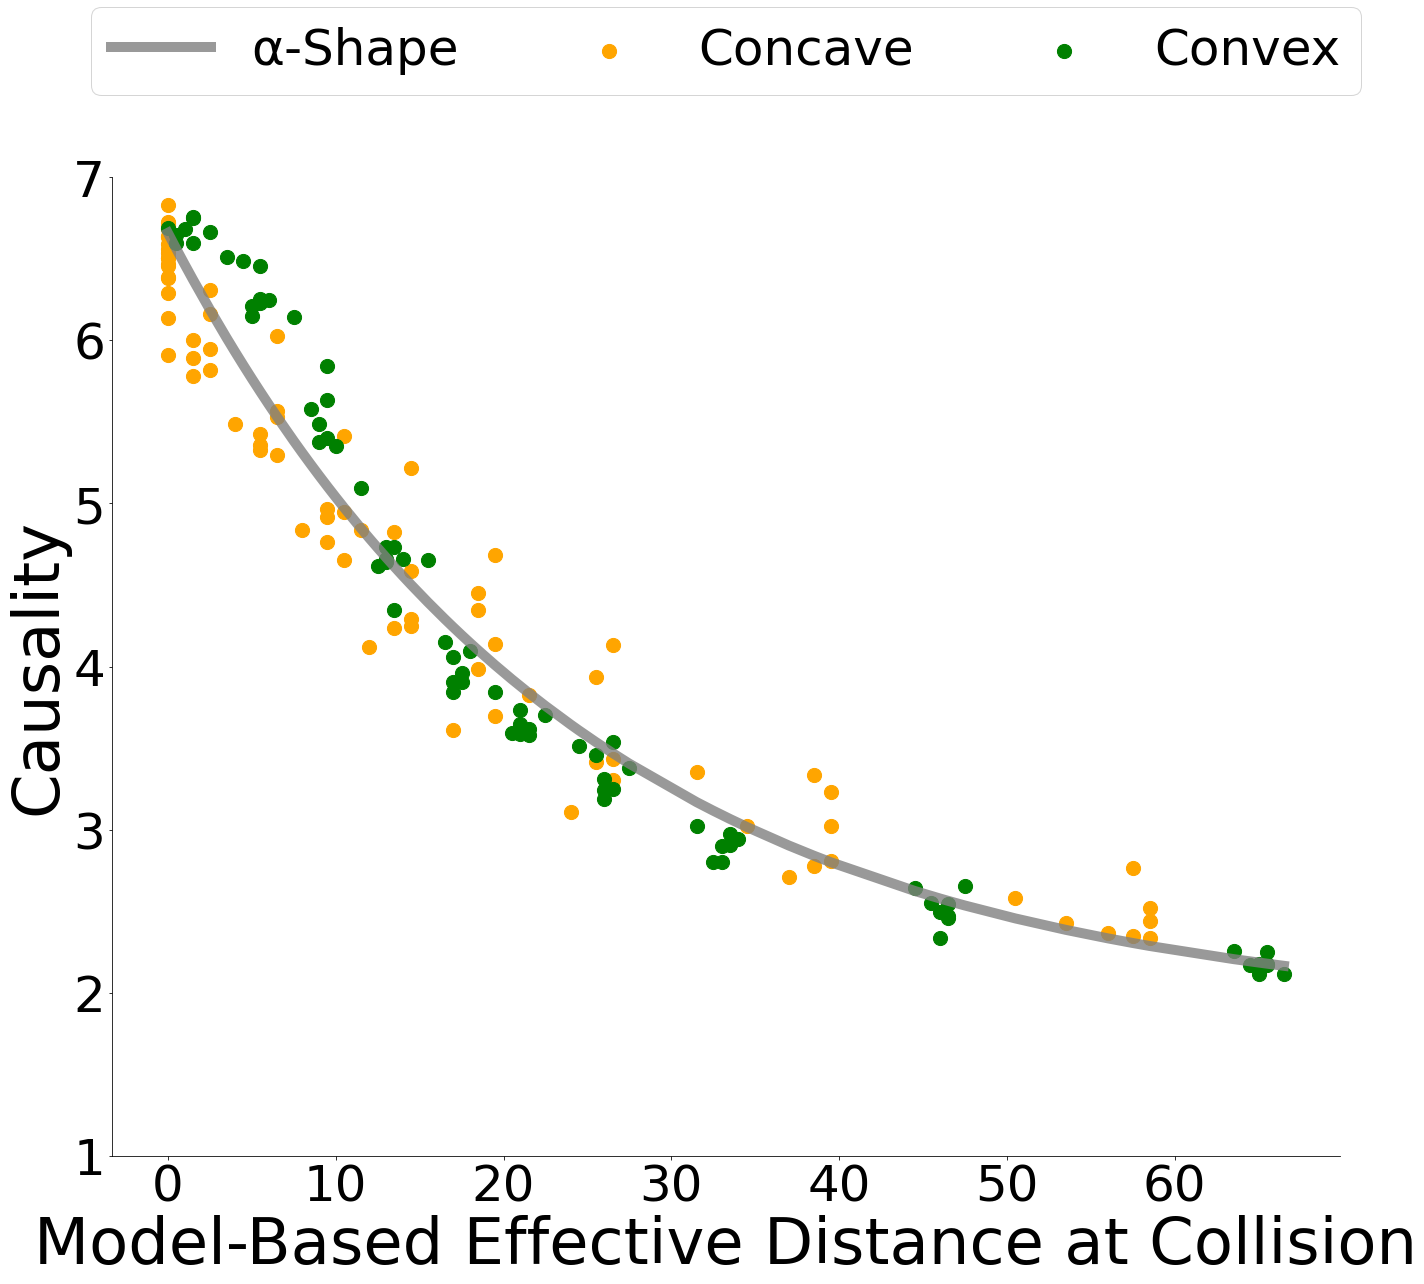

In [26]:
_, ax = plt.subplots(1,1, figsize=(22, 18))
LABELFONTSIZE = 64
TICKFONTSIZE = 50
LEGENDFONTSIZE = 50

ax.scatter(x=Xconcave, y=Yconcave, s=200, label='Concave', color='orange')
ax.scatter(x=Xconvex, y=Yconvex, s=200, label='Convex', color='green')
ax.plot(sorted(X[:, min(modelrange)+bestmodeli]), 
           [x for _,x in sorted(zip(X[:, min(modelrange)+bestmodeli], bestprediction))], 
           'g-', lw=10,  color='gray', alpha=0.8, label='\u03B1-Shape')
ax.set_xlabel('Model-Based Effective Distance at Collision', fontsize=LABELFONTSIZE)
ax.set_ylabel('Causality', fontsize=LABELFONTSIZE)
ax.tick_params(axis="both", labelsize=TICKFONTSIZE) 
ax.legend(loc='upper center', ncol=3, fontsize=LEGENDFONTSIZE, bbox_to_anchor=(0.5, 1.2))
ax.spines['right'].set_visible(False) # remove top and right border
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylim(1,7)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))